# USE-CASE:

Cancer Detection Modelling (Label: diagnosis, Features: remaining columns except id column)

Deploy two best model based on the following criteria

**Model1:** Get the best model based on Confusion Matrix and Numerical Metrics

**Model2:** Get the best model based on Viz Metrics



## **IMPORT LIBRARIES**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **IMPORT DATA AND GET INFORMATION**

In [0]:
data = pd.read_csv('cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [0]:
data.drop(columns=['id'],axis=1,inplace=True)

In [0]:
data.shape

(569, 31)

In [0]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

## **DATA PREPROCESSING**

### Check and remove all duplicate records from dataframe

In [0]:
data.duplicated().any()

False

### If your data is continous numerical data, check with reference to domain whether the following parameters are valid or not:
  1. Negative Numbers are allowed or not.
  2. Positive Numbers are allowed or not.
  3. Complex Numbers are allowed or not.
  4. Decimals are allowed or just integers are expected

In [0]:
features = data.iloc[:,1:]

def check_negative(data=data,column = features):
  for column in features:
    if(data[column] < 0).any():
      print("Negative value present in: ", column)
    else:
      print("No Negative value present in: ",column)

check_negative()

No Negative value present in:  radius_mean
No Negative value present in:  texture_mean
No Negative value present in:  perimeter_mean
No Negative value present in:  area_mean
No Negative value present in:  smoothness_mean
No Negative value present in:  compactness_mean
No Negative value present in:  concavity_mean
No Negative value present in:  points_mean
No Negative value present in:  symmetry_mean
No Negative value present in:  dimension_mean
No Negative value present in:  radius_se
No Negative value present in:  texture_se
No Negative value present in:  perimeter_se
No Negative value present in:  area_se
No Negative value present in:  smoothness_se
No Negative value present in:  compactness_se
No Negative value present in:  concavity_se
No Negative value present in:  points_se
No Negative value present in:  symmetry_se
No Negative value present in:  dimension_se
No Negative value present in:  radius_worst
No Negative value present in:  texture_worst
No Negative value present in:  pe

### SEPARATING FEATURES AND LABELS

For Sklearn users:

Rules for Regression:
 1. Features and label must be in the form of numpy array
 2. Features must be in 2d array
 3. Label must be in 1d array

In [0]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [0]:
features = data.iloc[:,1:].values
label = data.iloc[:,0].values

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data['diagnosis']

label = data['diagnosis'].values

In [0]:
print("Dimension on feature is: ", features.ndim,"\t","Dimension of label: ", label.ndim, "\n")

Dimension on feature is:  2 	 Dimension of label:  1 



## **CHECK BALANCED AND UNBALANCED**

Testing the support for **0 (benign)** and support for **1 (malignant)**

In [0]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Count of B and M:  
 0    357
1    212
Name: diagnosis, dtype: int64 



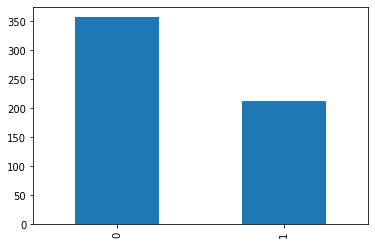

In [0]:
print("Count of B and M: ","\n", data['diagnosis'].value_counts(),"\n")
data.diagnosis.value_counts().plot(kind='bar')

**Analysis:** The data is unbalanced

## SPLIT TRAIN & TEST DATA

In [0]:
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state = i)
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>=0.99):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.9912280701754386 , Train: 0.9428571428571428 , RS : 59
Test: 0.9912280701754386 , Train: 0.9340659340659341 , RS : 155
Test: 0.9912280701754386 , Train: 0.9494505494505494 , RS : 366
Test: 0.9912280701754386 , Train: 0.9428571428571428 , RS : 422


## **MODEL SELECTION BASED ON CONFUSION MATRIX**

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M


**Average of Precision and Recall**

**Model 1:** 94% with     RS 59

**Model 2:** 93.5% with   RS 155

**Model 3:** 94.5% with   RS 366

**Model 4:** 93.5% with   RS 422


#### **MODEL 1 USING RS 59**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_M1,X_test_M1,y_train_M1,y_test_M1 = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=59)

In [0]:
model_M1 = LogisticRegression()
model_M1.fit(X_train_M1,y_train_M1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(model_M1.score(X_train_M1,y_train_M1))
print(model_M1.score(X_test_M1,y_test_M1))

0.9428571428571428
0.9912280701754386


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label,model_M1.predict(features))

array([[346,  11],
       [ 16, 196]])

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M

In [0]:
from sklearn.metrics import classification_report
print(classification_report(label,model_M1.predict(features)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       357
           1       0.95      0.92      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



**Analysis:** Average is **94 %** which is **not acceptable** for **SL = 0.05**

#### **MODEL 2 USING RS 155**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_M2,X_test_M2,y_train_M2,y_test_M2 = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=155)

In [0]:
model_M2 = LogisticRegression()
model_M2.fit(X_train_M2,y_train_M2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(model_M2.score(X_train_M2,y_train_M2))
print(model_M2.score(X_test_M2,y_test_M2))

0.9340659340659341
0.9912280701754386


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label,model_M2.predict(features))

array([[343,  14],
       [ 17, 195]])

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M

In [0]:
from sklearn.metrics import classification_report
print(classification_report(label,model_M2.predict(features)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       357
           1       0.93      0.92      0.93       212

    accuracy                           0.95       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



**Analysis:** Average is **93.5 %** which is **not acceptable** for **SL = 0.05**

#### **MODEL 3 USING RS 366**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_M3,X_test_M3,y_train_M3,y_test_M3 = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=366)

In [0]:
model_M3 = LogisticRegression()
model_M3.fit(X_train_M3,y_train_M3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(model_M3.score(X_train_M3,y_train_M3))
print(model_M3.score(X_test_M3,y_test_M3))

0.9494505494505494
0.9912280701754386


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label,model_M3.predict(features))

array([[348,   9],
       [ 15, 197]])

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M

In [0]:
from sklearn.metrics import classification_report
print(classification_report(label,model_M3.predict(features)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       357
           1       0.96      0.93      0.94       212

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



**Analysis:** Average is **94.5 %** which is **not acceptable** for **SL = 0.05**

#### **MODEL 4 USING RS 422**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_M4,X_test_M4,y_train_M4,y_test_M4 = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=422)

In [0]:
model_M4 = LogisticRegression()
model_M4.fit(X_train_M4,y_train_M4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(model_M4.score(X_train,y_train))
print(model_M4.score(X_test_M4,y_test_M4))

0.945054945054945
0.9912280701754386


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label,model_M4.predict(features))

array([[347,  10],
       [ 17, 195]])

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M

In [0]:
from sklearn.metrics import classification_report
print(classification_report(label,model_M4.predict(features)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       357
           1       0.95      0.92      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



**Analysis:** Average is **93.5 %** which is **not acceptable** for **SL = 0.05**

## **Analysis:** Based on **Confusion Matrix**, **Model 3** with RS **366** is the best Model

Model is **ACCEPTED** for **SL=0.2** however **REJECTED** for **SL=0.05**

## **Observation:** Since Data is **unbalanced data**, hence we should use **PR AUC Curve** for **Visualization**

## **PR Curve**

AUC Area

**Model 1:** 99.6%

**Model 2:** 100%

**Model 3:** 99.8%

**Model 4:** 99.3%


### MODEL 1 PR Curve

0.996748303675454


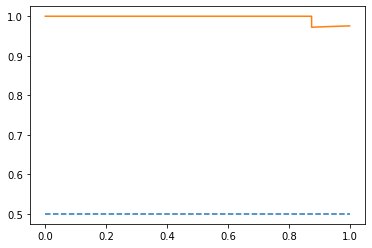

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model_M1.predict_proba(X_test_M1)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test_M1, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)


### MODEL 2 PR Curve

1.0


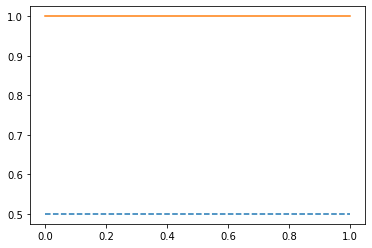

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model_M2.predict_proba(X_test_M2)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test_M2, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)


### MODEL 3 PR Curve

0.9990440949737898


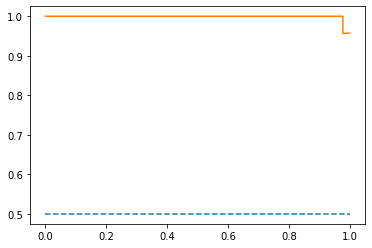

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model_M3.predict_proba(X_test_M3)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test_M3, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)


### MODEL 4 PR Curve

0.9930924873158506


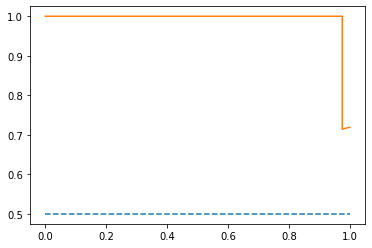

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model_M4.predict_proba(X_test_M4)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test_M4, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)


## **Analysis:** Based on **Visualization Matrix**, **Model 2** with RS **155** is the best Model

The Model is **ACCPTED** for **SL=0.2** but **REJECTED** for **SL=0.05**

## **APPLYING KNN ALGORITHM** 

**Confusion matrix:** USING LOGISTIC REGRESSIONS BEST MODEL SPLIT i.e **RS = 366**

**Visualization Matrix:** USING LOGISTIC REGRESSIONS BEST MODEL SPLIT i.e **RS = 155**

### **FOR LOOP TO CHECK SUITED N_NEIGHBOR VALUE**

**Analysis:** Found No value in range 1-10, hence will go for **Square Root** method

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def find_n_neighbor():
    for i in range(1,10):
        modelKNN = KNeighborsClassifier(n_neighbors=i)
        modelKNN.fit(X_train_M3,y_train_M3) 
        TrainScore = modelKNN.score(X_train_M3,y_train_M3)
        TestScore =  modelKNN.score(X_test_M3,y_test_M3)
        print("Train score for ", i, " is: ", TrainScore )
        print("Test score for ", i, " is: ", TestScore, "\n")
        if TestScore > TrainScore:
            best_n_neighbor_value = i
            break
    return best_n_neighbor_value

n_neighbor = find_n_neighbor()
print("Best value for n_neighbor is: ", n_neighbor)

1
Train score for  1  is:  1.0
Test score for  1  is:  0.956140350877193 

2
Train score for  2  is:  0.9384615384615385
Test score for  2  is:  0.9298245614035088 

3
Train score for  3  is:  0.9494505494505494
Test score for  3  is:  0.9385964912280702 

4
Train score for  4  is:  0.9428571428571428
Test score for  4  is:  0.9385964912280702 

5
Train score for  5  is:  0.945054945054945
Test score for  5  is:  0.9385964912280702 

6
Train score for  6  is:  0.9428571428571428
Test score for  6  is:  0.9210526315789473 

7
Train score for  7  is:  0.9362637362637363
Test score for  7  is:  0.9298245614035088 

8
Train score for  8  is:  0.9340659340659341
Test score for  8  is:  0.9298245614035088 

9
Train score for  9  is:  0.9318681318681319
Test score for  9  is:  0.9298245614035088 



### **Using SQUARE ROOT method to find N_Neighbor value**

**Obtained Value:** 21

In [0]:
from math import sqrt
round(sqrt(len(X_train_M3)))

21

### **CONFUSION MATRIX: RS=366 & N_NEIGHBOR=21**

**Check for Non Tolerant data:**

M (1) -> B (0) (Non Tolerant)

B (0) -> M (1)

Precision of B

Recall of M

In [0]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN_CF = KNeighborsClassifier(n_neighbors=21)
modelKNN_CF.fit(X_train_M3,y_train_M3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [0]:
print("Train score", modelKNN_CF.score(X_train_M3,y_train_M3))
print("Test score", modelKNN_CF.score(X_test_M3,y_test_M3))

Train score 0.9252747252747253
Test score 0.9385964912280702


The Test Score is not grater than the Train Score

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_M3,modelKNN_CF.predict(X_test_M3))

array([[69,  0],
       [ 7, 38]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_M3,modelKNN_CF.predict(X_test_M3)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        69
           1       1.00      0.84      0.92        45

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



### **Average** of precision and recall is **87.5%**

The Model is **ACCEPTED** for **SL=0.2**, however **REJECTED** for **SL=0.05**

### **VISUALIZATION MATRIX: RS=155 & N_NEIGHBOR=21**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN_VM = KNeighborsClassifier(n_neighbors=21)
modelKNN_VM.fit(X_train_M2,y_train_M2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [0]:
print("Train score", modelKNN_VM.score(X_train_M2,y_train_M2))
print("Test score", modelKNN_VM.score(X_test_M2,y_test_M2))

Train score 0.9230769230769231
Test score 0.9736842105263158


0.998717146934783


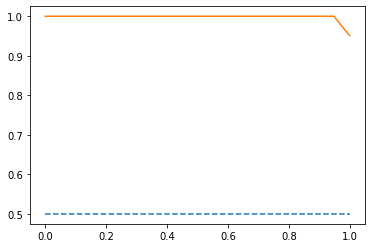

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = modelKNN_VM.predict_proba(X_test_M2)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test_M2, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)

### **AUC Area: 99.8%**

The Model is **ACCEPTED** for **SL=0.2**, however **REJECTED** for **SL=0.05**